In [1]:
# Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()

In [10]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['date', 'June Temps'])
june_temps_df.set_index(june_temps_df['date'], inplace=True)
june_temps_df = june_temps_df.sort_index()
print(june_temps_df.to_string(index=False))

      date  June Temps
2010-06-01        78.0
2010-06-01        73.0
2010-06-01        77.0
2010-06-01        69.0
2010-06-01        76.0
2010-06-01        71.0
2010-06-01        74.0
2010-06-01        70.0
2010-06-01        74.0
2010-06-02        78.0
2010-06-02        70.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        71.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        72.0
2010-06-02        76.0
2010-06-03        74.0
2010-06-03        78.0
2010-06-03        73.0
2010-06-03        72.0
2010-06-03        77.0
2010-06-03        76.0
2010-06-03        75.0
2010-06-03        78.0
2010-06-03        67.0
2010-06-04        73.0
2010-06-04        75.0
2010-06-04        75.0
2010-06-04        76.0
2010-06-04        73.0
2010-06-04        68.0
2010-06-04        72.0
2010-06-04        70.0
2010-06-04        74.0
2010-06-05        73.0
2010-06-05        77.0
2010-06-05        78.0
2010-06-05        76.0
2010-06-05        72.0
2010-06-05        79.0
2010-06-05 

In [43]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_summary = june_temps_df.describe()
june_summary

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


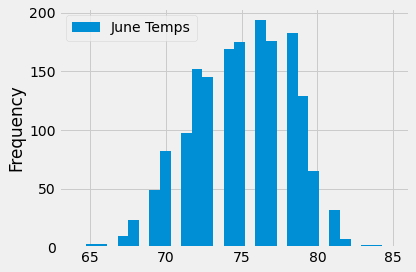

In [25]:
june_temps_df.plot.hist(bins=30)
plt.tight_layout()

In [23]:
session.query(Measurement.station, func.count(Measurement.station)).\
filter(extract('month', Measurement.date)==6).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519397', 236),
 ('USC00519281', 236),
 ('USC00513117', 236),
 ('USC00519523', 232),
 ('USC00516128', 223),
 ('USC00514830', 186),
 ('USC00511918', 165),
 ('USC00517948', 148),
 ('USC00518838', 38)]

In [35]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [37]:
june_station_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date)==6).all()
print(june_station_results)

[(71.0,), (71.0,), (72.0,), (72.0,), (76.0,), (77.0,), (71.0,), (73.0,), (73.0,), (75.0,), (81.0,), (74.0,), (77.0,), (70.0,), (69.0,), (70.0,), (72.0,), (71.0,), (77.0,), (76.0,), (74.0,), (74.0,), (74.0,), (74.0,), (71.0,), (80.0,), (77.0,), (72.0,), (72.0,), (73.0,), (72.0,), (73.0,), (73.0,), (77.0,), (76.0,), (79.0,), (78.0,), (82.0,), (79.0,), (76.0,), (74.0,), (74.0,), (73.0,), (79.0,), (77.0,), (73.0,), (72.0,), (72.0,), (73.0,), (74.0,), (77.0,), (73.0,), (73.0,), (72.0,), (72.0,), (67.0,), (71.0,), (73.0,), (78.0,), (71.0,), (72.0,), (70.0,), (72.0,), (73.0,), (74.0,), (81.0,), (72.0,), (77.0,), (69.0,), (69.0,), (69.0,), (78.0,), (78.0,), (73.0,), (72.0,), (71.0,), (72.0,), (72.0,), (73.0,), (71.0,), (70.0,), (71.0,), (68.0,), (72.0,), (71.0,), (78.0,), (81.0,), (74.0,), (74.0,), (73.0,), (73.0,), (72.0,), (73.0,), (77.0,), (73.0,), (73.0,), (75.0,), (72.0,), (72.0,), (73.0,), (73.0,), (75.0,), (72.0,), (73.0,), (70.0,), (69.0,), (68.0,), (75.0,), (74.0,), (73.0,), (70.0,), 

In [39]:
june_station_df = pd.DataFrame(june_station_results, columns=['tobs'])
# stick our results into dataframe 'df', with the 'tobs' data in our columns
print(june_station_df)

     tobs
0    71.0
1    71.0
2    72.0
3    72.0
4    76.0
..    ...
231  73.0
232  76.0
233  77.0
234  76.0
235  76.0

[236 rows x 1 columns]


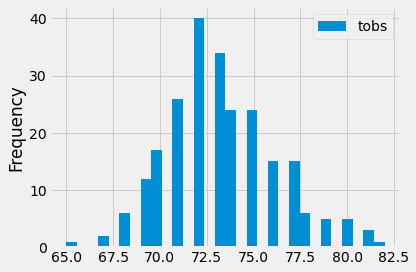

In [41]:
june_station_df.plot.hist(bins=30)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [15]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)

In [16]:
# 7. Convert the December temperatures to a list.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

In [17]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date', 'Dec Temps'])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)
dec_temps_df = dec_temps_df.sort_index()
print(dec_temps_df.to_string(index=False))

      date  Dec Temps
2010-12-01       76.0
2010-12-01       73.0
2010-12-01       72.0
2010-12-01       78.0
2010-12-01       72.0
2010-12-01       70.0
2010-12-01       71.0
2010-12-01       73.0
2010-12-02       71.0
2010-12-02       71.0
2010-12-02       73.0
2010-12-02       75.0
2010-12-02       74.0
2010-12-02       72.0
2010-12-02       74.0
2010-12-02       70.0
2010-12-03       67.0
2010-12-03       74.0
2010-12-03       70.0
2010-12-03       74.0
2010-12-03       71.0
2010-12-03       74.0
2010-12-03       72.0
2010-12-03       73.0
2010-12-04       75.0
2010-12-04       72.0
2010-12-04       77.0
2010-12-04       74.0
2010-12-04       74.0
2010-12-04       78.0
2010-12-04       74.0
2010-12-05       66.0
2010-12-05       69.0
2010-12-05       71.0
2010-12-05       78.0
2010-12-05       73.0
2010-12-05       73.0
2010-12-05       69.0
2010-12-06       65.0
2010-12-06       61.0
2010-12-06       61.0
2010-12-06       64.0
2010-12-06       66.0
2010-12-06       78.0
2010-12-06

In [44]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_summary = dec_temps_df.describe()
dec_summary

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


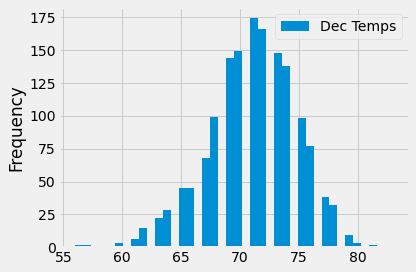

In [26]:
dec_temps_df.plot.hist(bins=40)
plt.tight_layout()

In [29]:
session.query(Measurement.station, func.count(Measurement.station)).\
filter(extract('month', Measurement.date)==12).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 217),
 ('USC00513117', 216),
 ('USC00519523', 210),
 ('USC00519397', 210),
 ('USC00516128', 206),
 ('USC00514830', 178),
 ('USC00511918', 152),
 ('USC00517948', 109),
 ('USC00518838', 19)]

In [30]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [38]:
dec_station_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date)==12).all()
print(dec_station_results)

[(72.0,), (71.0,), (72.0,), (74.0,), (66.0,), (61.0,), (58.0,), (60.0,), (71.0,), (65.0,), (72.0,), (70.0,), (68.0,), (67.0,), (71.0,), (65.0,), (64.0,), (65.0,), (69.0,), (70.0,), (70.0,), (68.0,), (69.0,), (71.0,), (70.0,), (71.0,), (76.0,), (71.0,), (72.0,), (73.0,), (77.0,), (67.0,), (69.0,), (72.0,), (74.0,), (71.0,), (70.0,), (68.0,), (70.0,), (66.0,), (72.0,), (70.0,), (70.0,), (70.0,), (70.0,), (73.0,), (71.0,), (69.0,), (73.0,), (72.0,), (71.0,), (69.0,), (70.0,), (69.0,), (70.0,), (75.0,), (71.0,), (70.0,), (69.0,), (71.0,), (65.0,), (67.0,), (72.0,), (67.0,), (76.0,), (67.0,), (72.0,), (69.0,), (66.0,), (75.0,), (74.0,), (72.0,), (72.0,), (72.0,), (68.0,), (74.0,), (73.0,), (73.0,), (72.0,), (70.0,), (70.0,), (71.0,), (70.0,), (72.0,), (65.0,), (62.0,), (73.0,), (71.0,), (70.0,), (62.0,), (69.0,), (69.0,), (66.0,), (72.0,), (73.0,), (70.0,), (66.0,), (64.0,), (65.0,), (73.0,), (74.0,), (67.0,), (73.0,), (70.0,), (67.0,), (71.0,), (78.0,), (69.0,), (63.0,), (64.0,), (66.0,), 

In [40]:
dec_station_df = pd.DataFrame(dec_station_results, columns=['tobs'])
# stick our results into dataframe 'df', with the 'tobs' data in our columns
print(dec_station_df)

     tobs
0    72.0
1    71.0
2    72.0
3    74.0
4    66.0
..    ...
212  71.0
213  72.0
214  74.0
215  69.0
216  67.0

[217 rows x 1 columns]


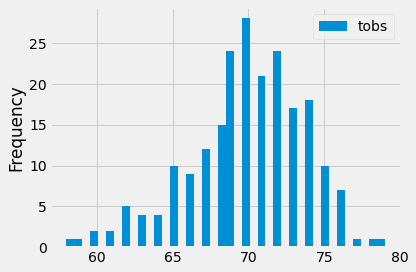

In [42]:
dec_station_df.plot.hist(bins=40)
plt.tight_layout()

In [46]:
### Summary Stats

summary_df = june_summary.merge(dec_summary, left_index=True, right_index=True)
summary_df

,June Temps,Dec Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000
